In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from PIL import Image

In [34]:
dataset_path=os.listdir('Rice_Dataset')
rice_types=os.listdir('Rice_Dataset')
print(rice_types)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [35]:
print('Types of rices found: ',len(rice_types))

Types of rices found:  5


In [36]:
rices=[]
for item in rice_types:
    # Get all the file names
    all_rices=os.listdir('Rice_Dataset'+'/'+item)
    # Add them to the list
    for rice in all_rices:
        rices.append((item,str('Rice_Dataset'+'/'+item)+'/'+rice))

In [37]:
rices[:10]

[('Arborio', 'Rice_Dataset/Arborio/Arborio (1).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (10).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (100).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (1000).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (1001).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (1002).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (1003).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (1004).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (1005).jpg'),
 ('Arborio', 'Rice_Dataset/Arborio/Arborio (1006).jpg')]

In [38]:
# Build a dataframe
rice_df=pd.DataFrame(data=rices,columns=['rice type','image'])
print(rice_df.head())

  rice type                                    image
0   Arborio     Rice_Dataset/Arborio/Arborio (1).jpg
1   Arborio    Rice_Dataset/Arborio/Arborio (10).jpg
2   Arborio   Rice_Dataset/Arborio/Arborio (100).jpg
3   Arborio  Rice_Dataset/Arborio/Arborio (1000).jpg
4   Arborio  Rice_Dataset/Arborio/Arborio (1001).jpg


In [39]:
print('Total number of rices in the dataset: ',len(rice_df))

Total number of rices in the dataset:  25000


In [40]:
rice_count=rice_df['rice type'].value_counts()
print(rice_count)

rice type
Arborio      5000
Basmati      5000
Ipsala       5000
Jasmine      5000
Karacadag    5000
Name: count, dtype: int64


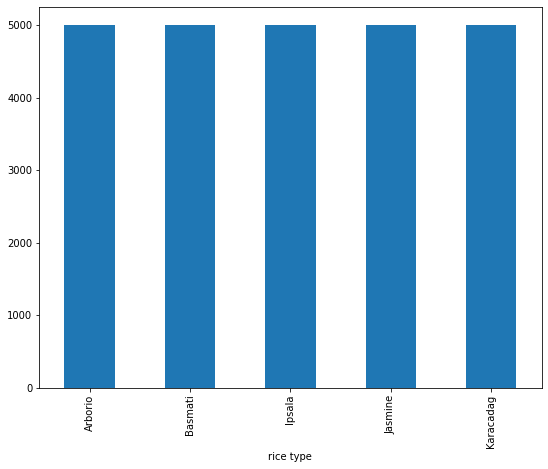

In [41]:
rice_df['rice type'].value_counts().plot(kind='bar',figsize=(9,7))
plt.show()

In [42]:
images=[]
for i in rice_df['image']:
    img=cv2.imread(str(i))
    resized_img=cv2.resize(img,(80,80))
    images.append(resized_img)

In [43]:
le=LabelEncoder()
labels=le.fit_transform(rice_df['rice type'])

In [44]:
images[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [45]:
images[0].shape

(80, 80, 3)

In [46]:
labels[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
images,labels=shuffle(images,labels)

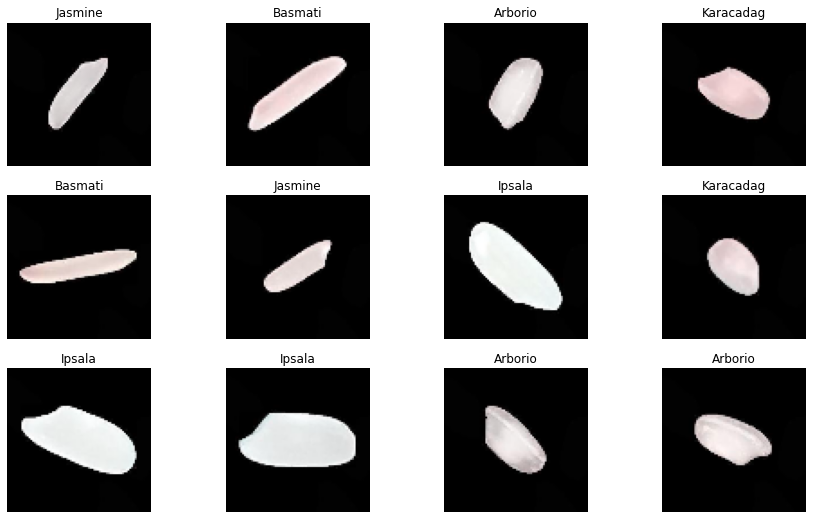

In [55]:
plt.figure(figsize=(15,9))
for i in range(0,12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(images[i])
    plt.title(rice_types[labels[i]])
    plt.axis('off')

In [56]:
images=np.array(images)

In [57]:
images.shape

(25000, 80, 80, 3)

In [58]:
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=101,stratify=labels,shuffle=True)

In [59]:
X_train.shape

(20000, 80, 80, 3)

In [60]:
X_test.shape

(5000, 80, 80, 3)

In [61]:
X_train_scaled=X_train/255

In [62]:
X_test_scaled=X_test/255

In [63]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [76]:
model=Sequential()

In [77]:
model.add(Conv2D(32,(3,3),padding='same',activation='leaky_relu',input_shape=(80,80,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3),padding='same',activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3),padding='same',activation='leaky_relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='leaky_relu'))
model.add(Dense(len(rice_types),activation='softmax'))

In [78]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 80, 80, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 40, 40, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,629 (432.14 KB)

 Trainable params: 110,629 (432.14 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
early_stopping=EarlyStopping(monitor='val_loss',patience=2)

In [81]:
history=model.fit(X_train_scaled,y_train,epochs=30,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 101s 79ms/step - accuracy: 0.8824 - loss: 0.3125 - val_accuracy: 0.9750 - val_loss: 0.0783
Epoch 2/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9758 - loss: 0.0734 - val_accuracy: 0.9780 - val_loss: 0.0586
Epoch 3/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9765 - loss: 0.0674 - val_accuracy: 0.9835 - val_loss: 0.0530
Epoch 4/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9815 - loss: 0.0550 - val_accuracy: 0.9840 - val_loss: 0.0426
Epoch 5/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9831 - loss: 0.0525 - val_accuracy: 0.9875 - val_loss: 0.0370
Epoch 6/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9873 - loss: 0.0389 - val_accuracy: 0.9915 - val_loss: 0.0329
Epoch 7/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9883 - loss: 0.0333 - val_accuracy: 0.9885 - val_loss: 0.0465
Epoch 8/30
563/563 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9870 - loss: 0.0359 -

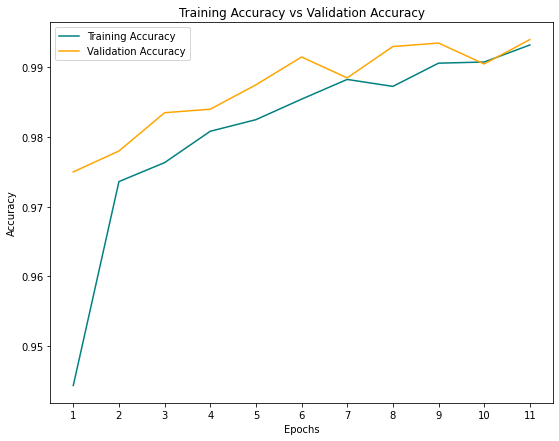

In [90]:
plt.figure(figsize=(9,7))
plt.plot(history.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10,11])
plt.legend()
plt.show()

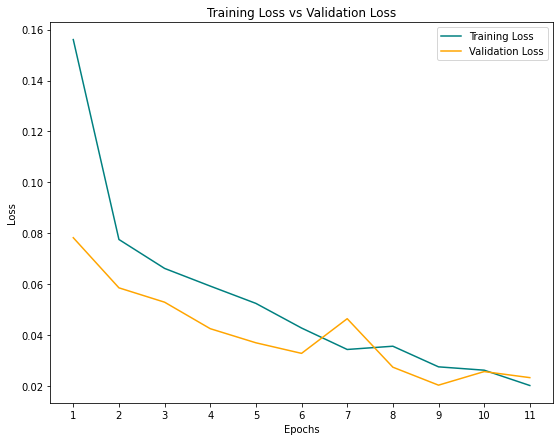

In [93]:
plt.figure(figsize=(9,7))
plt.plot(history.history['loss'],color='teal',label='Training Loss')
plt.plot(history.history['val_loss'],color='orange',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10,11])
plt.legend()
plt.show()

In [94]:
model.evaluate(X_test_scaled,y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9900 - loss: 0.0275


[0.02661673165857792, 0.9909999966621399]

In [96]:
y_pred=model.predict(X_test_scaled)
y_pred[:5]

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


array([[3.3872995e-05, 3.9421921e-04, 1.1533432e-08, 9.9957198e-01,
        7.8805833e-09],
       [3.8072555e-18, 9.9999988e-01, 6.2502785e-08, 5.6040252e-09,
        1.4507944e-17],
       [5.0777186e-24, 4.6756852e-11, 1.0000000e+00, 1.1863925e-31,
        7.5308038e-29],
       [1.0629650e-11, 3.1950712e-08, 1.0000000e+00, 3.6496301e-20,
        7.0050811e-16],
       [5.9180325e-06, 1.6804498e-04, 7.1620794e-09, 9.9982601e-01,
        2.0895826e-12]], dtype=float32)

In [97]:
y_predicted=[np.argmax(i) for i in y_pred]
y_predicted[:5]

[3, 1, 2, 2, 3]

In [98]:
y_test[:5]

array([3, 1, 2, 2, 3])

In [103]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1000
           1       1.00      0.99      0.99      1000
           2       1.00      1.00      1.00      1000
           3       0.98      1.00      0.99      1000
           4       0.98      0.99      0.99      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



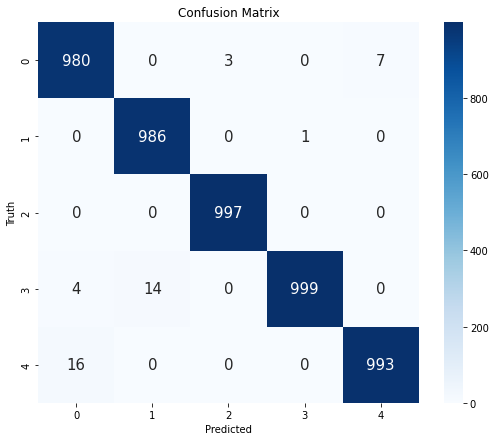

In [105]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_predicted,y_test),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [130]:
def get_image(path):
    image=Image.open(path)
    image=image.resize((80,80))
    image=np.array(image)
    img=image
    image=image/255
    image=image.reshape([1,80,80,3])
    pred=np.argmax(model.predict(image))
    predict=le.inverse_transform([pred])[0]
    print('The rice in the image belongs to',predict,'type')
    plt.imshow(img)
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The rice in the image belongs to Ipsala type


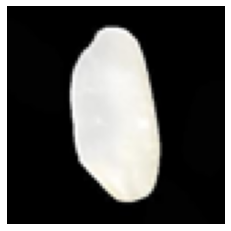

In [131]:
get_image('Rice_Dataset/Ipsala (12140).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The rice in the image belongs to Arborio type


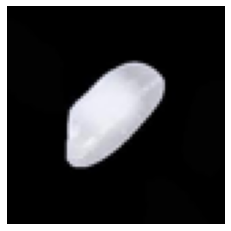

In [133]:
get_image('Rice_Dataset/Arborio (14295).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The rice in the image belongs to Basmati type


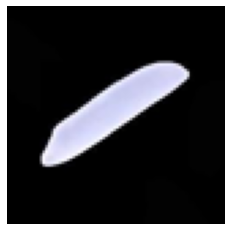

In [134]:
get_image('Rice_Dataset/basmati (12381).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The rice in the image belongs to Jasmine type


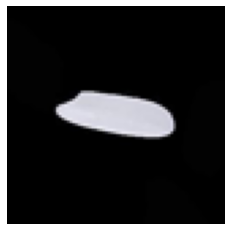

In [135]:
get_image('Rice_Dataset/Jasmine (9482).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
The rice in the image belongs to Karacadag type


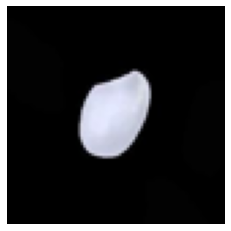

In [140]:
get_image('Rice_Dataset/Karacadag (13878).jpg')